In [117]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from random import randint

In [14]:
#Montaje de archivos de google drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
#Carga de datos
dataset_mnist_fashion = pd.read_csv('/content/gdrive/MyDrive/EL2/Practica3/fashion-mnist_test.csv')

In [33]:
dataset_mnist_fashion[0:10]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,44,105,44,10,...,105,64,30,0,0,0,0,0,0,0
6,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,6,0,0,0,0,0,0,0,1,0,...,174,136,155,31,0,1,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,57,70,28,0,2,0,0,0,0,0


In [67]:
ds = dataset_mnist_fashion

#Separar columna label
labels = ds["label"].tolist()
ds = ds.drop("label", 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [36]:
#Normalización de los datos
ds = (ds - ds.mean()) / ds.std(ddof=0)

In [37]:
#Calcular matrix de correlación
ds_corr = ds.corr()

In [ ]:
#Calcular eigen vectores y eigen values
u,s,v = np.linalg.svd(ds_corr)
eig_values, eig_vectors = s, u
eig_values, eig_vectors

In [39]:
#Verificar suma de eigen values = número de caracteristicas
np.sum(eig_values)

783.9999999999998

In [41]:
#Graficar varianza explicada por cada dimension
varianza=(eig_values / np.sum(eig_values))*100

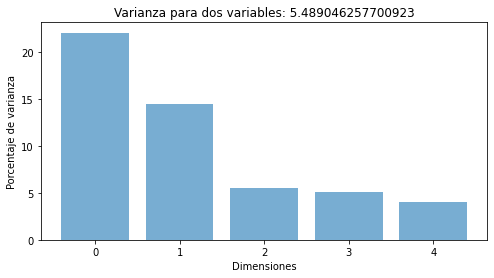

In [64]:
plt.figure(figsize=(8,4))
plt.bar(range(5), varianza[0:5], alpha=0.6)
plt.title("Varianza para dos variables: " + str(varianza[2]))
plt.ylabel('Porcentaje de varianza')
plt.xlabel('Dimensiones')
plt.show()

In [65]:
#Calculo de nuevos ejes
pc1 = ds.dot(eig_vectors[:,0])
pc2 = ds.dot(eig_vectors[:,1])

In [113]:
pca = np.column_stack((pc1,pc2))

In [86]:
#Utilizar TSNE
ds_embedded = TSNE(n_components=2).fit_transform(ds)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10000, 2)

## Comparar representaciones

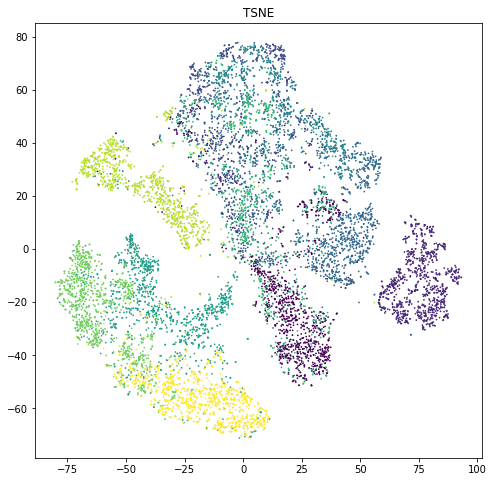

In [107]:
#Comparar representaciones
plt.figure(figsize=(8,8))
plt.title("TSNE")
plt.scatter(ds_embedded[:,0], ds_embedded[:,1], c = labels, s = 0.5)
plt.show()

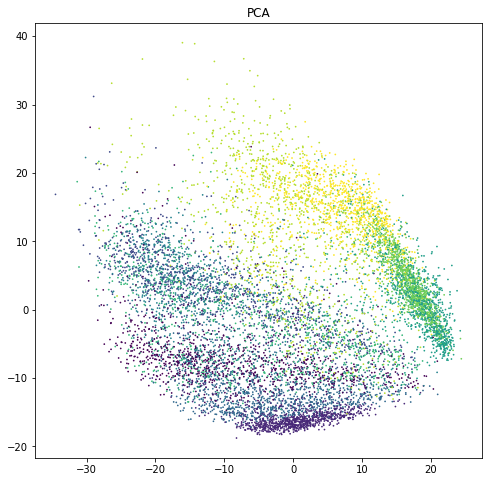

In [108]:
plt.figure(figsize=(8,8))
plt.title("PCA")
plt.scatter(pc1, pc2, c = labels, s = 0.5)
plt.show()

## Kmeans

### PCA

In [132]:
#PCA
km = KMeans(n_clusters=10, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(pca)

In [121]:
color = []
n = 10
for i in range(n):
    color.append('#%06X' % randint(0, 0xFFFFFF))

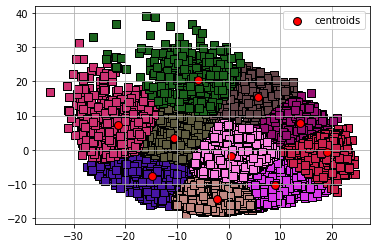

In [133]:
for a in range(10):
  plt.scatter(
    pca[y_km == a, 0], pca[y_km == a, 1],
    s=50, c=color[a],
    marker='s', edgecolor='black'
  )

plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='.',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

### TSNE

In [129]:
#TSNE
km = KMeans(n_clusters=10, init='random',n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = km.fit_predict(ds_embedded)

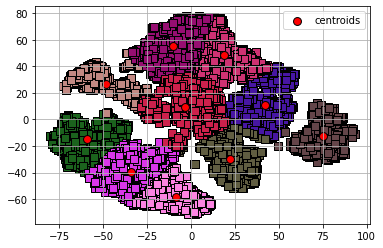

In [130]:
for a in range(10):
  plt.scatter(
    ds_embedded[y_km == a, 0], ds_embedded[y_km == a, 1],
    s=50, c=color[a],
    marker='s', edgecolor='black'
  )

# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='.',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()

## Conclusiones

Al aplicar clustering para las versiones reducidas del dataset se encontraron mejores resultados con la versión PCA.